In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)

In [7]:
# load the cleaned and processed data
os.chdir('/Users/jed/Documents/JED/Dataiku/drive-download-20250106T224222Z-001')
!ls
#load the train and test datasets into pandas df
train_data=pd.read_csv('census_income_learn_ready_for_modelling.csv')
train_data.drop('Unnamed: 0', axis=1, inplace=True)
train_data.describe()
train_data.dtypes

census_income_additional_info.pdf
census_income_learn.csv
census_income_learn_ready_for_modelling.csv
census_income_metadata.txt
census_income_test.csv


TARGET_bin                             int64
Age                                    int64
Male                                   int64
Married                                int64
Race_white                             int64
Education_Grade-school               float64
Education_Graduate                   float64
Education_HS-grad                    float64
Education_HS-nongrad                 float64
Employment_Government                float64
Employment_Not in paid employment    float64
Employment_Private                   float64
Employment_Self-employed             float64
Parents_birth                          int64
dtype: object

In [11]:
# convert float columns to integers
df=train_data.copy()
float_cols = df.select_dtypes(include='float').columns 
df[float_cols] = df[float_cols].astype(int)  
#rename label col
df = df.rename(columns={'TARGET_bin': 'Label'})
df.dtypes

Label                                int64
Age                                  int64
Male                                 int64
Married                              int64
Race_white                           int64
Education_Grade-school               int64
Education_Graduate                   int64
Education_HS-grad                    int64
Education_HS-nongrad                 int64
Employment_Government                int64
Employment_Not in paid employment    int64
Employment_Private                   int64
Employment_Self-employed             int64
Parents_birth                        int64
dtype: object

Text(0, 0.5, 'Count')

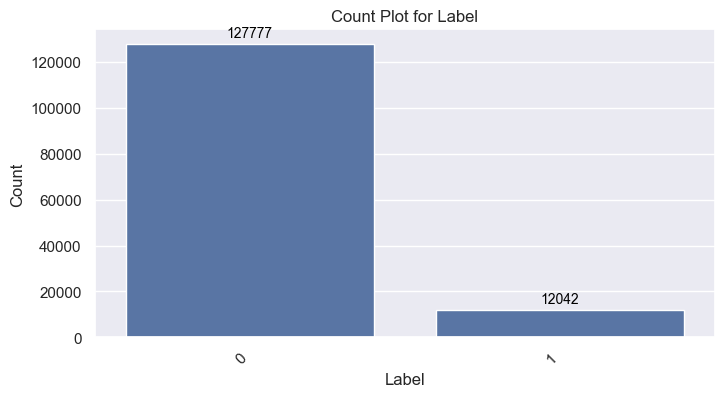

In [20]:
category_counts = df['Label'].value_counts().sort_index()

sns.set()
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='Label', data=df)

# Add counts above the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Count Plot for Label')
plt.xlabel('Label')
plt.ylabel('Count')



In [27]:
from sklearn.preprocessing import StandardScaler

y=df['Label']
X=df.drop('Label', axis=1)

#Scale Data
scaler=StandardScaler()

X_scaled=scaler.fit_transform(X)
  


In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, f1_score, recall_score
from sklearn.inspection import permutation_importance

random_state=1903

#these are the classifiers we are testing, I have added a couple others too
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=random_state)
}

f1_scores=[]

clf=RandomForestClassifier(class_weight = "balanced")
stratify_feature=y
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1903)
for train_index, test_index in skf.split(X, stratify_feature):
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    true_event_count = np.sum(y_train)
    #print('no. of training events for fold', d, '=', true_event_count)
    true_event_count = np.sum(y_test)
    #print('no. of test events for fold', d, '=', true_event_count)
    


    
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    
    f1 = f1_score(y_test, y_pred, average='binary')
    f1_scores.append(f1)

print(f1_scores)

[0.4080188679245283, 0.39608908202064097, 0.4029105125977411, 0.4040026391027051, 0.40636604774535806]


In [37]:
from imbalanced_learn.over_sampling import SMOTENC,SMOTE

smote_nc = SMOTE(random_state=1903, k_neighbors=3, sampling_strategy=0.5)
X_train_res, y_train_res = smote_nc.fit_resample(X, y)

resampled_data = pd.DataFrame(X_train_res, columns=X.columns)
resampled_data['Label'] = y_train_res
resampled_data.to_csv("SMOTE_Resampled_census_income_learn_ready_for_modelling.csv",index=False)

ModuleNotFoundError: No module named 'imbalanced_learn'

In [36]:
from imblearn.over_sampling import RandomOverSampler

ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/site-packages/sklearn/exceptions.py)

In [32]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

ImportError: cannot import name 'UnsetMetadataPassedError' from 'sklearn.exceptions' (/usr/local/lib/python3.11/site-packages/sklearn/exceptions.py)

In [41]:
import sklearn
print(sklearn.__version__)

1.2.2
